# Confusion matrix

Compute confusion matrix on :
- public test dataset 
- using finetunned models
    - ~~VGG16 (224x224)~~
        - ~~`test_acc=0.472 | test_f170=0.067`~~
    - InceptionResNetV2 (299x299) + TTA 
        - `test_acc=0.714 | test_f170=0.33`
    - InceptionResNetV2 (452x452) + TTA
        - `test_acc= | test_f170=`

In [2]:
import os 
import sys
import numpy as np
import cv2

sys.path.append("../submissions/")
sys.path.append("../")

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
from rampwf.workflows.image_classifier import _chunk_iterator
n_classes = 403
class_names = [str(i) for i in range(n_classes)]

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

In [6]:
from sklearn.metrics import confusion_matrix

## InceptionResNetV2 model

- Image size (299x299)
- TTA

In [89]:
from keras_inceptionResNetV2_finetunning_imbalanced2.image_preprocessor import transform, transform_test
from keras_inceptionResNetV2_finetunning_imbalanced2.batch_classifier import BatchClassifier, load_pretrained_model
from problem import get_cv, Predictions, score_types, get_test_data

In [ ]:
builder = BatchClassifier()
load_pretrained_model(builder.model, logs_path='/home/working_directory/ml/ramp-kits/pollenating_insects_3/logs_2017-10-05-00-27')

In [ ]:
trained_model = transform, transform_test, builder
folder_X_array, y_train = get_train_data(path="..")

In [ ]:
from problem import workflow
workflow.n_jobs = 10
workflow.chunk_size = 256
workflow.test_batch_size = 128

In [ ]:
y_proba = workflow.test_submission(trained_model, folder_X_array)

In [19]:
y_true_labels = y_train
y_pred_labels = np.argmax(y_proba_batch, axis=1)

In [46]:
res = np.zeros((n_classes, 2), dtype=np.int)

In [47]:
for y_true, y_pred in zip(y_true_labels, y_pred_labels):
    res[y_true, 1] += 1
    if y_true == y_pred:
        res[y_true, 0] += 1

In [75]:
class_recalls = res[:, 0] / (res[:, 1] + 1e-7)

In [86]:
classes_small_recall = np.where((class_recalls < 0.95) & (class_recalls > 0.01))
class_small_recalls = class_recalls[classes_small_recall]

In [87]:
classes_small_recall[0], class_small_recalls

(array([ 57,  78,  94, 124, 131, 134, 159, 179, 202]),
 array([ 0.83,  0.67,  0.67,  0.5 ,  0.5 ,  0.33,  0.75,  0.67,  0.93]))

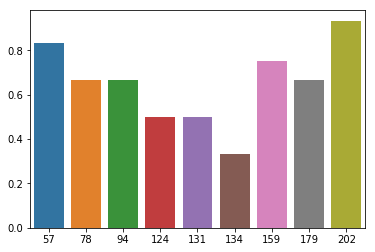

In [88]:
sns.barplot(y=class_small_recalls, x=classes_small_recall[0])

In [ ]:
confusion_matrix()